# Chapter 1

This Jupyter Notebook is to be used to following the code in Chapter 1 of the textbook.  Add new cells by clicking the + sign and enter code to test out what you entered.  The first code cell below should be run in order to run all the other code in the textbook.

__[Section 1.3](https://inferentialthinking.com/chapters/01/3/Plotting_the_Classics.html)__


In [4]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

# Section 1.3
First, run the code cell above.  The analysis is about The Adventures of Huckleberry Finn.

In [5]:
# Read two books, fast!

huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

In [6]:
# Display the chapters of Huckleberry Finn in a table.

Table().with_column('Chapters', huck_finn_chapters)

Chapters
I. YOU don't know about me without you have read a book ...
II. WE went tiptoeing along a path amongst the trees bac ...
"III. WELL, I got a good going-over in the morning from o ..."
"IV. WELL, three or four months run along, and it was wel ..."
V. I had shut the door to. Then I turned around and ther ...
"VI. WELL, pretty soon the old man was up and around agai ..."
"VII. ""GIT up! What you 'bout?"" I opened my eyes and look ..."
VIII. THE sun was up so high when I waked that I judged ...
IX. I wanted to go and look at a place right about the m ...
X. AFTER breakfast I wanted to talk about the dead man a ...


# Section 1.3.1 Literary Characters

Text(0.5, 1.08, 'Cumulative Number of Times Each Name Appears')

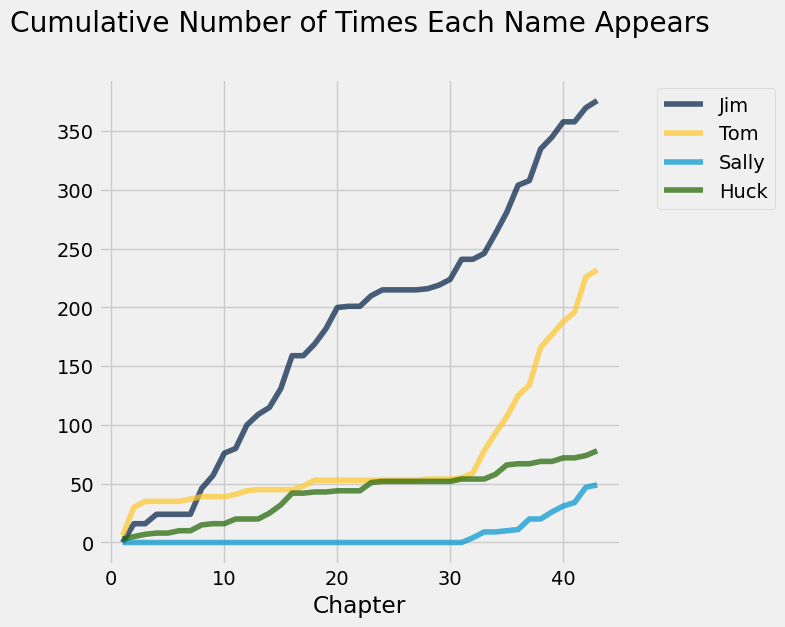

In [8]:
# Get the cumulative counts the names Jim, Tom, and Huck appear in each chapter.

counts = Table().with_columns([
        'Jim', np.cumsum(np.char.count(huck_finn_chapters, 'Jim')),
        'Tom', np.cumsum(np.char.count(huck_finn_chapters, 'Tom')),
        'Sally', np.cumsum(np.char.count(huck_finn_chapters, 'Sally')),
        'Huck', np.cumsum(np.char.count(huck_finn_chapters, 'Huck'))
    ])

# Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.

cum_counts = counts.with_column('Chapter', np.arange(1, 44, 1))
cum_counts.plot(column_for_xticks=4)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08)

# Analysis about Little Women

In [9]:
# The chapters of Little Women, in a table

Table().with_column('Chapters', little_women_chapters)

Chapters
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas witho ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in the gr ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" cried Me ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to take up ..."
"FIVE BEING NEIGHBORLY ""What in the world are you going t ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did pr ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a perfect ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you going?"" as ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was the most ..."
"TEN THE P.C. AND P.O. As spring came on, a new set of am ..."


Text(0.5, 1.08, 'Cumulative Number of Times Each Name Appears')

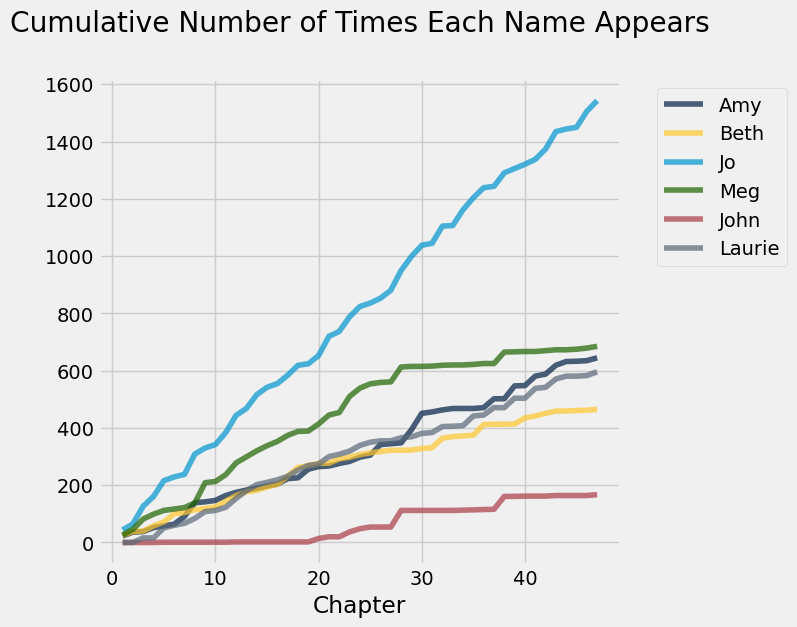

In [12]:
# Get the cumulative counts of the names in the chapters of Little Women

counts = Table().with_columns([
        'Amy', np.cumsum(np.char.count(little_women_chapters, 'Amy')),
        'Beth', np.cumsum(np.char.count(little_women_chapters, 'Beth')),
        'Jo', np.cumsum(np.char.count(little_women_chapters, 'Jo')),
        'Meg', np.cumsum(np.char.count(little_women_chapters, 'Meg')),
        'John', np.cumsum(np.char.count(little_women_chapters, 'John')),
        'Laurie', np.cumsum(np.char.count(little_women_chapters, 'Laurie')),

    ])

# Plot the cumulative counts.

cum_counts = counts.with_column('Chapter', np.arange(1, 48, 1))
cum_counts.plot(column_for_xticks=6)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08)

# Section 1.3.2

In [13]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

chars_periods_huck_finn = Table().with_columns([
        'Huck Finn Chapter Length', [len(s) for s in huck_finn_chapters],
        'Number of Periods', np.char.count(huck_finn_chapters, '.')
    ])
chars_periods_little_women = Table().with_columns([
        'Little Women Chapter Length', [len(s) for s in little_women_chapters],
        'Number of Periods', np.char.count(little_women_chapters, '.')
    ])

In [14]:
chars_periods_huck_finn

Huck Finn Chapter Length,Number of Periods
7026,66
11982,117
8529,72
6799,84
8166,91
14550,125
13218,127
22208,249
8081,71
7036,70


In [15]:
chars_periods_little_women

Little Women Chapter Length,Number of Periods
21759,189
22148,188
20558,231
25526,195
23395,255
14622,140
14431,131
22476,214
33767,337
18508,185


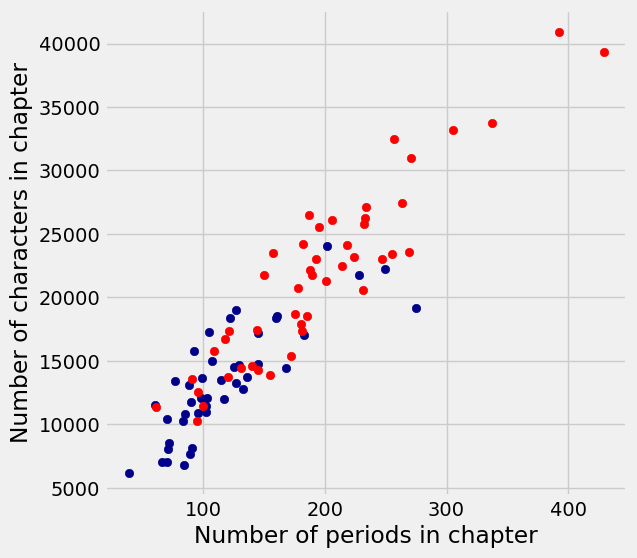

In [17]:
plots.figure(figsize=(6, 6))
plots.scatter(chars_periods_huck_finn.column(1), 
              chars_periods_huck_finn.column(0), 
              color='darkblue')
plots.scatter(chars_periods_little_women.column(1), 
              chars_periods_little_women.column(0), 
              color='red')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');

# Python Code Basics
We will start with the print command.  It will print out is in quotation marks.

In [18]:
print("Hello World!")

Hello World!


In [19]:
print('Hello World!')

Hello World!


In [20]:
print("Hello, my name is JoEllen.")

Hello, my name is JoEllen.


In [22]:
print("Hello, my name is JoEllen.")

Hello, my name is JoEllen.


In [23]:
print("I am happy today \N{GRINNING FACE}!")

I am happy today 😀!


In [24]:
print("I feel like winking \N{WINKING FACE}.")

I feel like winking 😉.


In [26]:
print("I like grapes 🍇.")

I like grapes 🍇.


In [27]:
print("My name is JoEllen.")
print("I feel happy \N{GRINNING FACE}.")
print("Did you them winking at you \N{WINKING FACE}?")

My name is JoEllen.
I feel happy 😀.
Did you them winking at you 😉?


# Errors
Not every piece of code you enter will be correct sometimes, it result in an error.  Then tat appends we need to find what happened.


In [29]:
print("My name is JoEllen.")

My name is JoEllen.


# Arithmetic Operations and Comments

- Multiplication *<br>
- Exponential **<br>
- Divide /<br>
- Addition + <br>
- Subtraction -
- Comments #

**Examples**
```
# Exponential
2**4  # 16 is the answer
# Multiplication
2*4  # 8 is the anwser
# Division
16/8  # 2 is the anwser
# Addition
10 + 2  # 12 is the answer
# Subtraction
20-4  #16 is the answer
```


In [31]:
# Exponential
2**4

16

In [33]:
# Multiplication
2*4

8

In [34]:
# Division
16/8

2.0

In [35]:
# Addition
10 + 2

12

In [36]:
# Subtraction
20 - 4

16

In [39]:
# Exponential
print("2 times 4 is",2**4)
# Multiplication
2*4

2 times 4 is 16


8

# Order of Operations
**PEMDAS**
- Parentheses
- Exponents
- Multiplication and Division from left to right
- Addition and subtraction from left to right

```
4**2 + 8 + 3**2 / 3<br>

[(3 + 2) - 7]*5 + 2*([6 *3] - 13)
```

4**2 + 8 + 3**2 / 3<br>
16 + 8 + 9/3<br>
16 + 8 + 3<br>
24 + 3<br>
27

In [40]:
4**2 + 8 + 3**2 / 3

27.0

((3 + 2) - 7)*5 + 2*((6 *3) - 13)<br>
(5 - 7)*5 + 2 *(18 - 13)<br>
(-2)*5 + 2 *(5)<br>
-10 + 10<br>
0

In [41]:
((3 + 2) - 7)*5 + 2*((6 *3) - 13)

0

# Variable Names
Starts with a letter not a number.  It can take the form of camel case myName or myname both of theses variable are okay but not the same.
- myName = "JoEllen"
- myname = "Amy"
- my_name = "Will"

```
print(myName)
print(myname)
print(my_name)
```

In [42]:
myName = "JoEllen"
myname = "Amy"
my_name = "Will"

In [43]:
print(myName)
print(myname)
print(my_name)

JoEllen
Amy
Will


# Payroll Calculations
```
hours = 40
rate = 25.50
week = hours * rate
print("She earned $",week,"this week.")
```

In [44]:
hours = 40
rate = 25.50
week = hours * rate
print("She earned $", week,"this week.")

She earned $ 1020.0 this week.


# Nested Expression
Where you have more than one operation in one of code.  Suppose you had two students with 3 exam scores.  Amy scored the following {89, 77, 93}.<br>
Eloise scored {99, 100, 65}.  In one line of code you want to find the maximum score for the two students.

```
max_score = max(max(89, 77, 93), max(99, 100, 65))
max_score
```


In [45]:
max_score = max(max(89, 77, 93), max(99, 100, 65))
max_score

100

#  What if you wanted to find the minimum score for the two students

In [46]:
min_score = min(min(89, 77, 93), min(99, 100, 65))
min_score

65

In your lab and homework assignment you will see the following.
```
min_score = ...
```
This indicates you need to replace the three dots with code.  You will also see code with the following.
```
grader.check("q3_1_2")
```
run the code cell to check if you are doing the problem correctly.  It will tell you if you in the right direction; but note there is a hidden test that you do not see that can be wrong.  So even if you pass some of the test you can still get the answer incorrect.  I know this can be flustrating.  Use the hints if given and take time to read the question carefully. Do not wait until the last minute to do your Lab and Homework assignment.  You can work with a classmate on the Lab assignment but not the Homework assignment.

**Make sure you save your Notebook by going to File > Save Notebook.  Then File>Download and upload your Jupyter Note in the Canvaa Classroom**

In [ ]:
grader.check_all()